<ipython-input-9-c318d702d7e1>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trends = shopping_data.groupby('Age Group')['Purchase Amount (USD)'].mean()


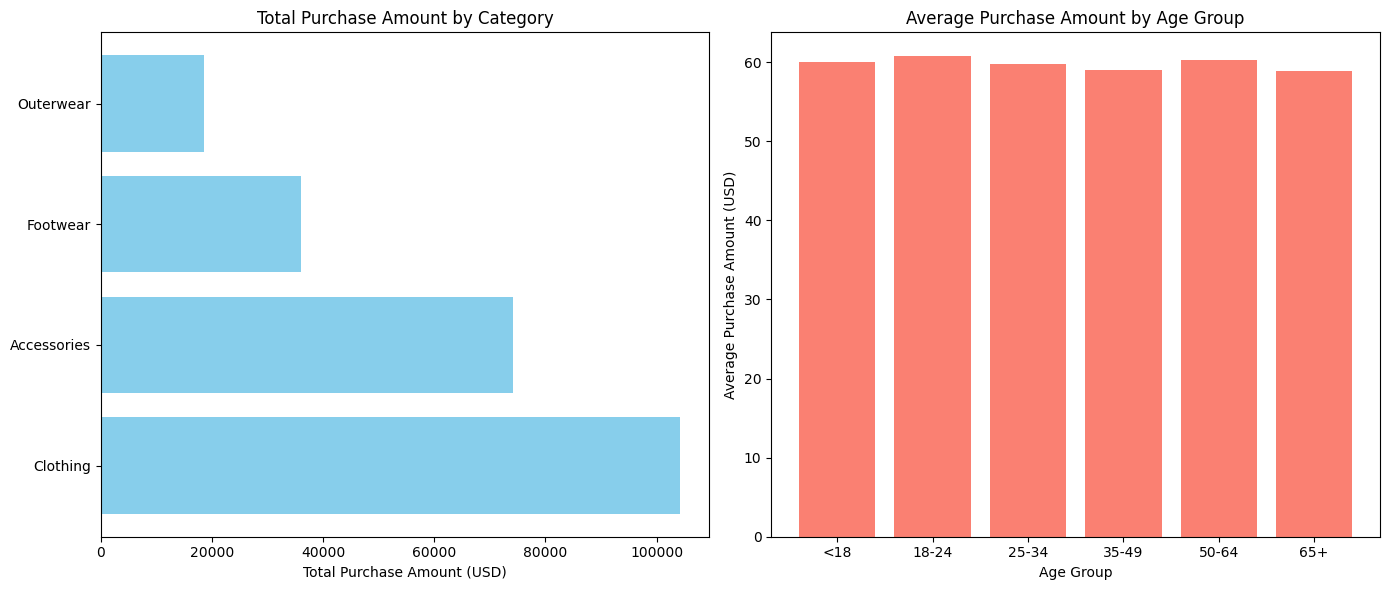

Top Selling and Top Rated Items: Item Purchased
Blouse     171
Pants      171
Shirt      169
Dress      166
Sweater    164
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Top colors in clothing: Color
Teal      84
Maroon    83
Black     81
Silver    80
Violet    79
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Purchase Trends by Season : Season
Fall      26220
Spring    27692
Summer    23078
Winter    27274
Name: Purchase Amount (USD), dtype: int64
----------------------------------------------------------------------------------------------------
Average Review Ratings for Clothing: Item Purchased
T-shirt    3.782993
Skirt      3.782278
Sweater    3.767073
Dress      3.754819
Socks      3.750943
Name: Review Rating, dtype: float64
--------------------------------------------------------------------------------------------------

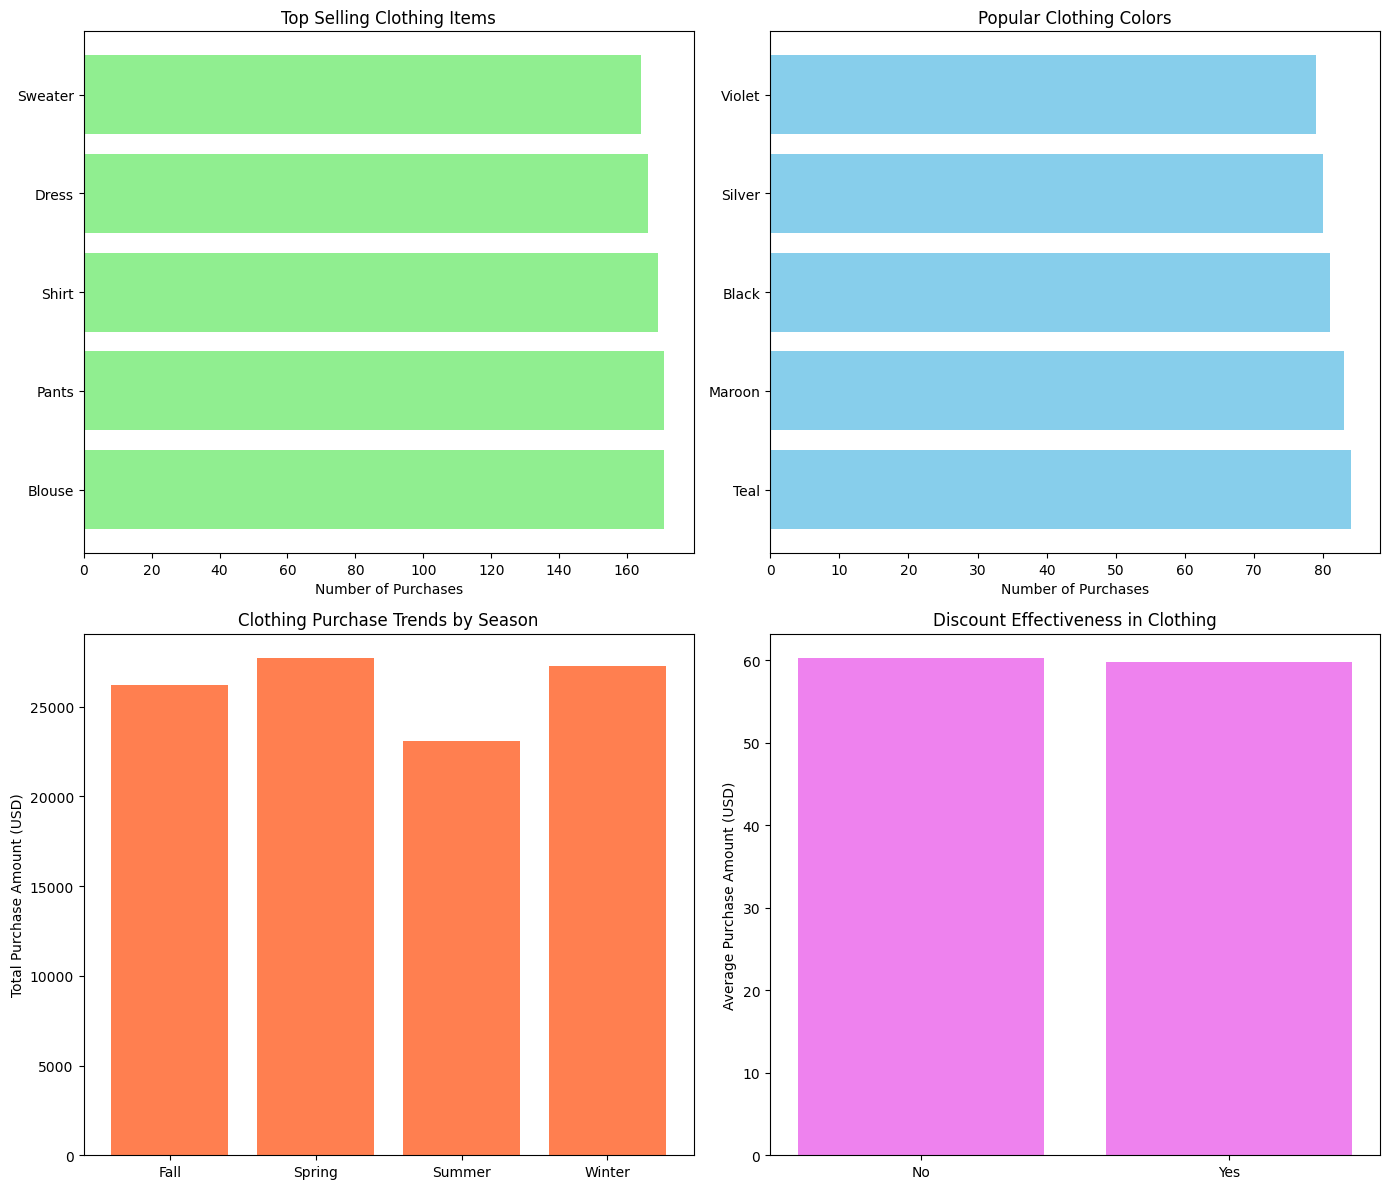

In [9]:
# Let's start by loading and reviewing the content of the uploaded CSV file to understand its structure and perform a shopping trend analysis.
import pandas as pd

# Load the CSV file
file_path = 'shopping_trends_updated.csv'
shopping_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
shopping_data.head()

import matplotlib.pyplot as plt

# 1. Total Purchase Amount by Category
category_trends = shopping_data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# 2. Average Purchase Amount by Age Group
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-49', '50-64', '65+']
shopping_data['Age Group'] = pd.cut(shopping_data['Age'], bins=age_bins, labels=age_labels)
age_trends = shopping_data.groupby('Age Group')['Purchase Amount (USD)'].mean()

# Plotting the graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Total Purchase Amount by Category
axes[0].barh(category_trends.index, category_trends.values, color='skyblue')
axes[0].set_xlabel('Total Purchase Amount (USD)')
axes[0].set_title('Total Purchase Amount by Category')

# Graph 2: Average Purchase Amount by Age Group
axes[1].bar(age_trends.index, age_trends.values, color='salmon')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Average Purchase Amount (USD)')
axes[1].set_title('Average Purchase Amount by Age Group')

plt.tight_layout()
plt.show()

# Filter data for the 'Clothing' category
clothing_data = shopping_data[shopping_data['Category'] == 'Clothing']

# 1. Top Selling Items
top_items = clothing_data['Item Purchased'].value_counts().head()

# 2. Top Colors in Clothing
top_colors = clothing_data['Color'].value_counts().head()

# 3. Purchase Trends by Season
season_trends = clothing_data.groupby('Season')['Purchase Amount (USD)'].sum()

# 4. Average Review Ratings for Clothing
avg_ratings = clothing_data.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False).head()

# 5. Discount Effectiveness in Clothing
discount_sales = clothing_data.groupby('Discount Applied')['Purchase Amount (USD)'].mean()

print("Top Selling and Top Rated Items:", top_items)
print("--"*50)
print("Top colors in clothing:", top_colors)
print("--"*50)
print("Purchase Trends by Season :", season_trends)
print("--"*50)
print("Average Review Ratings for Clothing:", avg_ratings)
print("--"*50)
print("Discount Effectiveness in Clothing:",discount_sales)
print("--"*50)



# Plotting the graphs based on the insights for the clothing category

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Graph 1: Top Selling Items
axes[0, 0].barh(top_items.index, top_items.values, color='lightgreen')
axes[0, 0].set_xlabel('Number of Purchases')
axes[0, 0].set_title('Top Selling Clothing Items')

# Graph 2: Popular Clothing Colors
axes[0, 1].barh(top_colors.index, top_colors.values, color='skyblue')
axes[0, 1].set_xlabel('Number of Purchases')
axes[0, 1].set_title('Popular Clothing Colors')

# Graph 3: Seasonal Purchase Trends
axes[1, 0].bar(season_trends.index, season_trends.values, color='coral')
axes[1, 0].set_ylabel('Total Purchase Amount (USD)')
axes[1, 0].set_title('Clothing Purchase Trends by Season')

# Graph 4: Discount Effectiveness
axes[1, 1].bar(discount_sales.index, discount_sales.values, color='violet')
axes[1, 1].set_ylabel('Average Purchase Amount (USD)')
axes[1, 1].set_title('Discount Effectiveness in Clothing')

plt.tight_layout()
plt.show()
